In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import joblib

In [2]:
# Load dataframe
df = pd.read_excel("Pool_BU_Dataset_final.xlsx")

In [3]:
# Initial display
df

,Name,Years of experience playing,Years of tournament experience,Win % tournaments,BU Drill 1 (max 10),BU Drill 2 (max 10),BU Drill 3 (max 10),BU Drill 4 (max 10),BU Drill 5 (max 10),BU Drill 6 (max 10),...,BU Drill 8 (max 20),BU Total (max 100),Table Difficulty: Mouth Size,Table Difficulty: Throat Size,Table Difficulty: Shelf Depth,Table Difficulty: Total (calculated with tool),FargoRate,Mental Drills (0/1),Eye Test Skill Level (1–10),Average weekly practice time
0,Dimitar Vladislavov,0.3,0.0,0.00,2,2,1,1,1,2,...,4,15,4.30,3.80,1.80,1.06,NaN,0,1,0.0
1,Kalin Varbanov,23.0,22.0,0.64,9,10,8,7,5,8,...,14,72,4.15,3.70,1.70,1.09,693.0,0,8,5.0
2,Alexander Georgiev,11.0,9.0,0.69,6,6,10,8,8,8,...,15,76,4.30,3.80,1.80,1.06,696.0,0,8,10.0
3,Milan Tomanov,1.0,0.6,0.07,4,3,3,4,2,4,...,9,33,4.30,3.80,1.80,1.06,NaN,1,3,11.0
4,Alex Kirilov,1.5,0.5,0.25,3,7,5,3,1,5,...,5,36,4.30,3.80,1.80,1.06,NaN,1,4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Daniel Christensen,4.0,2.0,0.19,6,5,5,4,2,4,...,5,34,4.75,3.85,1.75,1.02,348.0,0,3,NaN
72,Nick Medveditskov,4.0,0.0,0.00,4,4,3,4,3,7,...,7,38,4.75,4.00,1.15,0.92,NaN,0,3,NaN
73,Dave Anderson,9.0,7.0,0.39,5,5,4,2,3,4,...,7,34,4.60,4.25,1.50,0.91,412.0,0,3,NaN
74,Nancy Kennedy,3.0,2.0,0.46,5,5,4,2,3,5,...,5,37,4.50,4.25,1.50,0.93,427.0,1,3,NaN


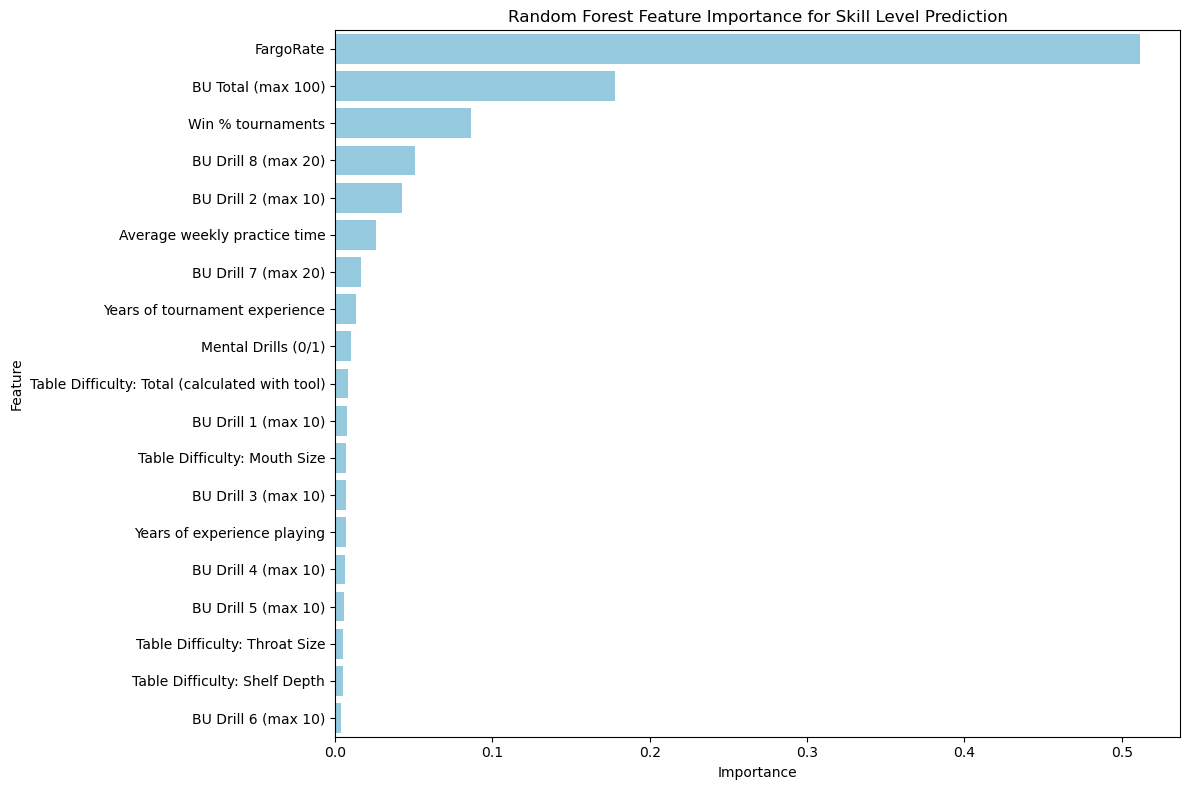

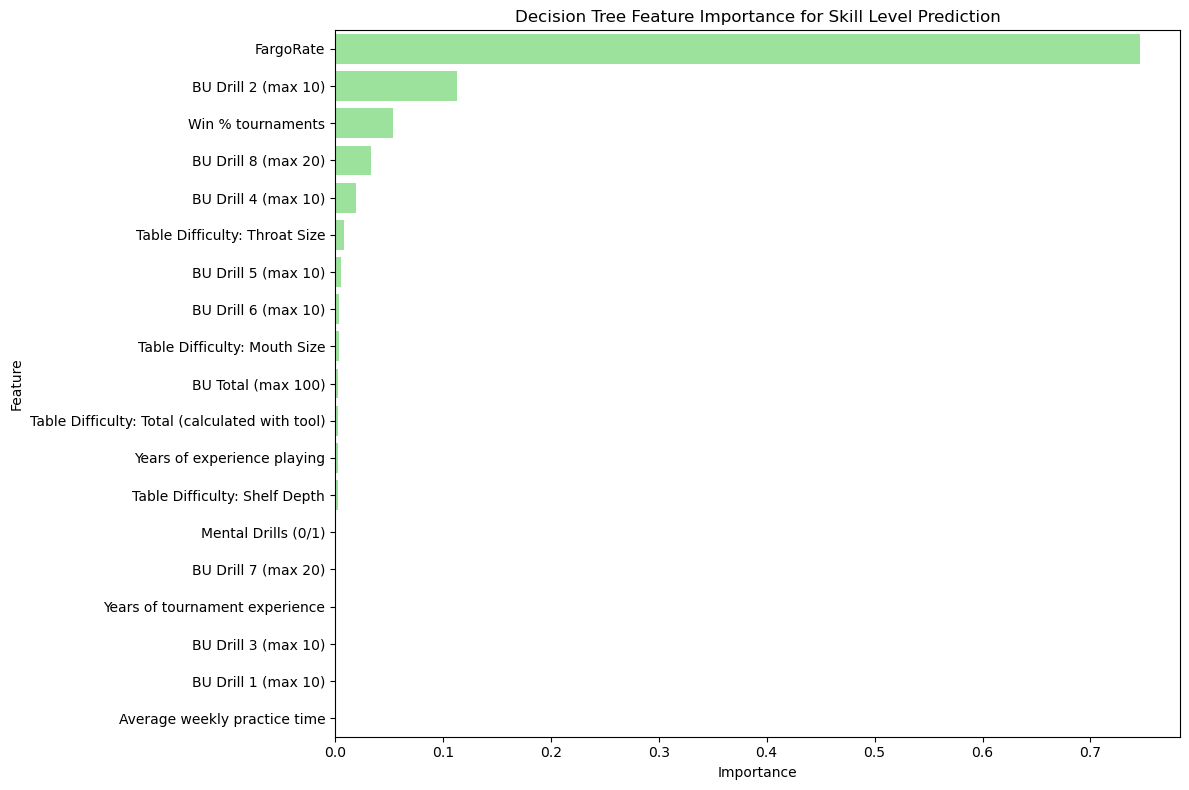

'Random Forest Feature Importance:'

,Feature,Importance
16,FargoRate,0.511362
11,BU Total (max 100),0.178187
2,Win % tournaments,0.086376
10,BU Drill 8 (max 20),0.050903
4,BU Drill 2 (max 10),0.042727
18,Average weekly practice time,0.026365
9,BU Drill 7 (max 20),0.016355
1,Years of tournament experience,0.013520
17,Mental Drills (0/1),0.010092
15,Table Difficulty: Total (calculated with tool),0.008164


'Decision Tree Feature Importance:'

,Feature,Importance
16,FargoRate,0.745650
4,BU Drill 2 (max 10),0.112971
2,Win % tournaments,0.053931
10,BU Drill 8 (max 20),0.033878
6,BU Drill 4 (max 10),0.019996
13,Table Difficulty: Throat Size,0.008887
7,BU Drill 5 (max 10),0.005207
8,BU Drill 6 (max 10),0.003819
12,Table Difficulty: Mouth Size,0.003749
11,BU Total (max 100),0.003231


In [4]:
#Feature importance

# Drop rows with missing 'Skill Level (1-10)' for prediction target
df_cleaned = df.dropna(subset=['Eye Test Skill Level (1–10)']).copy()

# Select features and target
# Dropping non-numeric and irrelevant columns for modeling
X = df_cleaned.drop(['Name', 'Eye Test Skill Level (1–10)'], axis=1)
y = df_cleaned['Eye Test Skill Level (1–10)']

# Handle missing values in features
# For simplicity, we'll fill missing values with the mean of each column
# A more robust approach might use imputation strategies like KNNImputer
X = X.fillna(X.mean())

# Convert categorical features (if any) to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42, max_depth=6)


# Train models
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Get feature importance
rf_importances = rf_model.feature_importances_
dt_importances = dt_model.feature_importances_


# Create DataFrames to store feature importances
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
})

dt_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_importances
})


# Sort by importance for visualization
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
dt_importance_df = dt_importance_df.sort_values(by='Importance', ascending=False)


# Plot feature importance for Random Forest
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance for Skill Level Prediction')
plt.tight_layout()
plt.show()

# Plot feature importance for Decision Tree
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=dt_importance_df, color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance for Skill Level Prediction')
plt.tight_layout()
plt.show()

# Display the feature importance DataFrames
display("Random Forest Feature Importance:")
display(rf_importance_df)
display("Decision Tree Feature Importance:")
display(dt_importance_df)

In [5]:
# Predict FargoRate for those who do not have it using 5 models
missing_fargorate_rows = df[df['FargoRate'].isna()]
train_fargorate_rows = df[df['FargoRate'].notna()]

if not missing_fargorate_rows.empty and not train_fargorate_rows.empty:
    X_train_fargo = train_fargorate_rows.drop(columns=['Name', 'Eye Test Skill Level (1–10)', 'FargoRate'], errors='ignore')
    X_train_fargo = X_train_fargo.apply(pd.to_numeric, errors='coerce').fillna(0)
    y_train_fargo = train_fargorate_rows['FargoRate']

    X_predict_fargo = missing_fargorate_rows.drop(columns=['Name', 'Eye Test Skill Level (1–10)', 'FargoRate'], errors='ignore')
    X_predict_fargo = X_predict_fargo.apply(pd.to_numeric, errors='coerce').fillna(0)

    # Train Random Forest Regressor
    rf_fargo_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_fargo_model.fit(X_train_fargo, y_train_fargo)
    predicted_fargorate_rf = rf_fargo_model.predict(X_predict_fargo)
    df.loc[df['FargoRate'].isna(), 'Predicted FargoRate (RF)'] = predicted_fargorate_rf

    # Train Linear Regression
    lr_fargo_model = LinearRegression()
    lr_fargo_model.fit(X_train_fargo, y_train_fargo)
    predicted_fargorate_lr = lr_fargo_model.predict(X_predict_fargo)
    df.loc[df['FargoRate'].isna(), 'Predicted FargoRate (LR)'] = predicted_fargorate_lr

    # Train Gradient Boosting Regressor
    gbr_fargo_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gbr_fargo_model.fit(X_train_fargo, y_train_fargo)
    predicted_fargorate_gbr = gbr_fargo_model.predict(X_predict_fargo)
    df.loc[df['FargoRate'].isna(), 'Predicted FargoRate (GBR)'] = predicted_fargorate_gbr

    # Train Support Vector Regressor
    from sklearn.svm import SVR
    svr_fargo_model = SVR(kernel='rbf')
    svr_fargo_model.fit(X_train_fargo, y_train_fargo)
    predicted_fargorate_svr = svr_fargo_model.predict(X_predict_fargo)
    df.loc[df['FargoRate'].isna(), 'Predicted FargoRate (SVR)'] = predicted_fargorate_svr

    # Train K-Nearest Neighbors Regressor
    from sklearn.neighbors import KNeighborsRegressor
    knn_fargo_model = KNeighborsRegressor(n_neighbors=5)
    knn_fargo_model.fit(X_train_fargo, y_train_fargo)
    predicted_fargorate_knn = knn_fargo_model.predict(X_predict_fargo)
    df.loc[df['FargoRate'].isna(), 'Predicted FargoRate (KNN)'] = predicted_fargorate_knn


display(df[['Name', 'FargoRate', 'Predicted FargoRate (RF)', 'Predicted FargoRate (LR)', 'Predicted FargoRate (GBR)', 'Predicted FargoRate (SVR)', 'Predicted FargoRate (KNN)']])

,Name,FargoRate,Predicted FargoRate (RF),Predicted FargoRate (LR),Predicted FargoRate (GBR),Predicted FargoRate (SVR),Predicted FargoRate (KNN)
0,Dimitar Vladislavov,NaN,367.61,172.944452,335.696643,545.882166,413.2
1,Kalin Varbanov,693.0,NaN,NaN,NaN,NaN,NaN
2,Alexander Georgiev,696.0,NaN,NaN,NaN,NaN,NaN
3,Milan Tomanov,NaN,375.78,272.460659,364.526139,546.405861,413.2
4,Alex Kirilov,NaN,392.17,363.462603,375.547370,546.295647,413.2
...,...,...,...,...,...,...,...
71,Daniel Christensen,348.0,NaN,NaN,NaN,NaN,NaN
72,Nick Medveditskov,NaN,366.98,200.946687,357.751548,546.146123,413.2
73,Dave Anderson,412.0,NaN,NaN,NaN,NaN,NaN
74,Nancy Kennedy,427.0,NaN,NaN,NaN,NaN,NaN


In [6]:
# Train linear regression model and extract 
X_fargo = df[[
    'Years of experience playing',
    'Years of tournament experience',
    'Win % tournaments',
    'BU Drill 1 (max 10)',
    'BU Drill 2 (max 10)',
    'BU Drill 3 (max 10)',
    'BU Drill 4 (max 10)',
    'BU Drill 5 (max 10)',
    'BU Drill 6 (max 10)',
    'BU Drill 7 (max 20)',
    'BU Drill 8 (max 20)',
    'BU Total (max 100)',
    'Table Difficulty: Total (calculated with tool)',
    'Mental Drills (0/1)'
]].fillna(0)

y_fargo = df['FargoRate'].fillna(0)

lr_fargo_model = LinearRegression()
lr_fargo_model.fit(X_fargo, y_fargo)

# Save model to pkl file
#joblib.dump(lr_fargo_model, "fargo_model.pkl")

LinearRegression()

In [7]:
# FargoRate is used for predicting missing values, so it can't directly evaluate on the original dataset.
# Instead, the training data is split (where FargoRate is known) and the train_fargorate_rows DataFrame is used to evaluate the models.

X_eval = train_fargorate_rows.drop(columns=['Name', 'Eye Test Skill Level (1–10)', 'FargoRate'], errors='ignore')
X_eval = X_eval.apply(pd.to_numeric, errors='coerce').fillna(0)
y_eval = train_fargorate_rows['FargoRate']

# Split the evaluation data into training and testing sets for evaluation purposes
X_train_eval, X_test_eval, y_train_eval, y_test_eval = train_test_split(X_eval, y_eval, test_size=0.25, random_state=42)

# Re-train the models on the X_train_eval data
rf_fargo_model.fit(X_train_eval, y_train_eval)
lr_fargo_model.fit(X_train_eval, y_train_eval)
gbr_fargo_model.fit(X_train_eval, y_train_eval)
svr_fargo_model.fit(X_train_eval, y_train_eval)
knn_fargo_model.fit(X_train_eval, y_train_eval)


# Make predictions on the X_test_eval data
y_pred_rf = rf_fargo_model.predict(X_test_eval)
y_pred_lr = lr_fargo_model.predict(X_test_eval)
y_pred_gbr = gbr_fargo_model.predict(X_test_eval)
y_pred_svr = svr_fargo_model.predict(X_test_eval)
y_pred_knn = knn_fargo_model.predict(X_test_eval)

# Evaluate the models
mse_rf = mean_squared_error(y_test_eval, y_pred_rf)
r2_rf = r2_score(y_test_eval, y_pred_rf)

mse_lr = mean_squared_error(y_test_eval, y_pred_lr)
r2_lr = r2_score(y_test_eval, y_pred_lr)

mse_gbr = mean_squared_error(y_test_eval, y_pred_gbr)
r2_gbr = r2_score(y_test_eval, y_pred_gbr)

mse_svr = mean_squared_error(y_test_eval, y_pred_svr)
r2_svr = r2_score(y_test_eval, y_pred_svr)

mse_knn = mean_squared_error(y_test_eval, y_pred_knn)
r2_knn = r2_score(y_test_eval, y_pred_knn)

# Display the evaluation results
print("Model Evaluation:")
print(f"Random Forest: MSE = {mse_rf:.2f}, R-squared = {r2_rf:.2f}")
print(f"Linear Regression: MSE = {mse_lr:.2f}, R-squared = {r2_lr:.2f}")
print(f"Gradient Boosting: MSE = {mse_gbr:.2f}, R-squared = {r2_gbr:.2f}")
print(f"Support Vector Regressor: MSE = {mse_svr:.2f}, R-squared = {r2_svr:.2f}")
print(f"K-Nearest Neighbors: MSE = {mse_knn:.2f}, R-squared = {r2_knn:.2f}")

Model Evaluation:
Random Forest: MSE = 7455.75, R-squared = 0.66
Linear Regression: MSE = 5780.11, R-squared = 0.74
Gradient Boosting: MSE = 7726.29, R-squared = 0.65
Support Vector Regressor: MSE = 21889.74, R-squared = 0.01
K-Nearest Neighbors: MSE = 11062.86, R-squared = 0.50


In [8]:
# Use the best performing model (Linear Regression) to predict missing FargoRate values - lowest error, highest variance
# The predictions were already made and stored in the 'Predicted FargoRate (LR)' column
# Fill the original 'FargoRate' column with the predicted values
df.loc[df['FargoRate'].isna(), 'FargoRate'] = df.loc[df['FargoRate'].isna(), 'Predicted FargoRate (LR)']

# Round the FargoRate column to the nearest whole number
df['FargoRate'] = df['FargoRate'].round().astype(int)

# Display the updated DataFrame with filled and rounded FargoRate values
display(df[['Name', 'FargoRate', 'Predicted FargoRate (LR)']])

,Name,FargoRate,Predicted FargoRate (LR)
0,Dimitar Vladislavov,173,172.944452
1,Kalin Varbanov,693,NaN
2,Alexander Georgiev,696,NaN
3,Milan Tomanov,272,272.460659
4,Alex Kirilov,363,363.462603
...,...,...,...
71,Daniel Christensen,348,NaN
72,Nick Medveditskov,201,200.946687
73,Dave Anderson,412,NaN
74,Nancy Kennedy,427,NaN


In [9]:
# Drop the predicted FargoRate columns as they are no longer needed
df = df.drop(columns=['Predicted FargoRate (RF)', 'Predicted FargoRate (LR)', 'Predicted FargoRate (GBR)', 'Predicted FargoRate (SVR)', 'Predicted FargoRate (KNN)'])

# Display the DataFrame to confirm the columns are dropped
display(df)

,Name,Years of experience playing,Years of tournament experience,Win % tournaments,BU Drill 1 (max 10),BU Drill 2 (max 10),BU Drill 3 (max 10),BU Drill 4 (max 10),BU Drill 5 (max 10),BU Drill 6 (max 10),...,BU Drill 8 (max 20),BU Total (max 100),Table Difficulty: Mouth Size,Table Difficulty: Throat Size,Table Difficulty: Shelf Depth,Table Difficulty: Total (calculated with tool),FargoRate,Mental Drills (0/1),Eye Test Skill Level (1–10),Average weekly practice time
0,Dimitar Vladislavov,0.3,0.0,0.00,2,2,1,1,1,2,...,4,15,4.30,3.80,1.80,1.06,173,0,1,0.0
1,Kalin Varbanov,23.0,22.0,0.64,9,10,8,7,5,8,...,14,72,4.15,3.70,1.70,1.09,693,0,8,5.0
2,Alexander Georgiev,11.0,9.0,0.69,6,6,10,8,8,8,...,15,76,4.30,3.80,1.80,1.06,696,0,8,10.0
3,Milan Tomanov,1.0,0.6,0.07,4,3,3,4,2,4,...,9,33,4.30,3.80,1.80,1.06,272,1,3,11.0
4,Alex Kirilov,1.5,0.5,0.25,3,7,5,3,1,5,...,5,36,4.30,3.80,1.80,1.06,363,1,4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Daniel Christensen,4.0,2.0,0.19,6,5,5,4,2,4,...,5,34,4.75,3.85,1.75,1.02,348,0,3,NaN
72,Nick Medveditskov,4.0,0.0,0.00,4,4,3,4,3,7,...,7,38,4.75,4.00,1.15,0.92,201,0,3,NaN
73,Dave Anderson,9.0,7.0,0.39,5,5,4,2,3,4,...,7,34,4.60,4.25,1.50,0.91,412,0,3,NaN
74,Nancy Kennedy,3.0,2.0,0.46,5,5,4,2,3,5,...,5,37,4.50,4.25,1.50,0.93,427,1,3,NaN


In [10]:
# Create a new DataFrame to store the calculated skill levels
df_formula = df.copy()

# Ensure 'Win % tournaments' is numeric and handle NaNs
df_formula['Win % tournaments'] = df_formula['Win % tournaments'].astype(str).str.rstrip('%').astype(float)
formula_cols_final = ["FargoRate", "BU Total (max 100)", "Win % tournaments",
                     "Years of experience playing", "BU Drill 7 (max 20)", "BU Drill 8 (max 20)"]
df_formula[formula_cols_final] = df_formula[formula_cols_final].fillna(df_formula[formula_cols_final].mean())

# Define normalized features using scaling in the refined formula
NF = (df_formula["FargoRate"] / 1000).clip(0, 1)
NB = (df_formula["BU Total (max 100)"] / 100).clip(0, 1)
NW = df_formula["Win % tournaments"].clip(0, 1)
NY = np.minimum(df_formula["Years of experience playing"] / 35.0, 1.0)
D7 = (df_formula["BU Drill 7 (max 20)"] / 20.0).clip(0, 1)
D8 = (df_formula["BU Drill 8 (max 20)"] / 20.0).clip(0, 1)

# Apply a refined "Top Boost" calculation
fargo_threshold_final = 650
bu_total_threshold_final = 75
max_boost_final = 2.5
fargo_boost_factor_final = 0.006
bu_total_boost_factor_final = 0.06

boost_amount_calculation_final = np.zeros(len(df_formula))
top_tier_mask_final = (df_formula['FargoRate'] > fargo_threshold_final) & (df_formula['BU Total (max 100)'] > bu_total_threshold_final)

boost_amount_calculation_final[top_tier_mask_final] = np.minimum(
    (df_formula.loc[top_tier_mask_final, 'FargoRate'] - fargo_threshold_final) * fargo_boost_factor_final +
    (df_formula.loc[top_tier_mask_final, 'BU Total (max 100)'] - bu_total_threshold_final) * bu_total_boost_factor_final,
    max_boost_final
)

# Apply the final formula to calculate the skill level
base_score_final = (
    0.45 * (NF**1.1) +
    0.30 * (NB**1.05) +
    0.10 * NW +
    0.05 * NY +
    0.05 * D7 +
    0.05 * D8
)

df_formula["Calculated_Skill_Level"] = 11.5 * base_score_final + boost_amount_calculation_final

# Ensure the calculated skill level is within the desired range (1-10)
df_formula['Calculated_Skill_Level'] = df_formula['Calculated_Skill_Level'].clip(lower=1, upper=10)

# Calculate the difference between original and calculated skill levels
df_formula['Skill_Level_Difference_Final'] = df_formula['Eye Test Skill Level (1–10)'] - df_formula['Calculated_Skill_Level']

# Display the final DataFrame with the calculated skill level
display(df_formula[['Name', 'Eye Test Skill Level (1–10)', 'FargoRate', 'BU Total (max 100)', 'Win % tournaments', 'Calculated_Skill_Level', 'Skill_Level_Difference_Final']].sort_values(by='Eye Test Skill Level (1–10)', ascending=False))

# Calculate and print overall MAE
from sklearn.metrics import mean_absolute_error
mae_final_full = mean_absolute_error(df_formula['Eye Test Skill Level (1–10)'], df_formula['Calculated_Skill_Level'])
print(f"\nMean Absolute Error (Final Calculated Skill Level - Entire Dataset): {mae_final_full:.2f}")

# Calculate and print MAE for top 40%
top_40_percent_count = int(len(df_formula) * 0.40)
df_formula_sorted = df_formula.sort_values(by='Eye Test Skill Level (1–10)', ascending=False).reset_index(drop=True)
df_final_top_40 = df_formula_sorted.head(top_40_percent_count).copy()
mae_final_top40 = mean_absolute_error(df_final_top_40['Eye Test Skill Level (1–10)'], df_final_top_40['Calculated_Skill_Level'])
print(f"Mean Absolute Error (Final Calculated Skill Level - Top 40%):        {mae_final_top40:.2f}")

,Name,Eye Test Skill Level (1–10),FargoRate,BU Total (max 100),Win % tournaments,Calculated_Skill_Level,Skill_Level_Difference_Final
22,Shane Van Boening,11,843,84,0.91,10.000000,1.000000
9,Georgi Georgiev,10,784,83,0.83,10.000000,0.000000
11,Can Salim,10,771,92,0.76,10.000000,0.000000
14,Tobias Bongers,10,794,97,0.80,10.000000,0.000000
19,Mark Gray,9,811,79,0.73,10.000000,-1.000000
...,...,...,...,...,...,...,...
52,Daniel Wilson,3,391,61,0.22,4.801225,-1.801225
3,Milan Tomanov,3,272,33,0.07,2.783551,0.216449
66,Steve Dahl,2,278,53,0.17,3.926759,-1.926759
69,Gareth Morris,2,181,30,0.00,2.043327,-0.043327



Mean Absolute Error (Final Calculated Skill Level - Entire Dataset): 1.09
Mean Absolute Error (Final Calculated Skill Level - Top 40%):        0.85


In [11]:
# Create a new column for the rounded skill level by rounding to the nearest whole number
df_formula['Rounded_Calculated_Skill_Level'] = df_formula['Calculated_Skill_Level'].round()

# Ensure the rounded skill level is within the 1-10 range after rounding
df_formula['Rounded_Calculated_Skill_Level'] = df_formula['Rounded_Calculated_Skill_Level'].clip(lower=1, upper=10)

# Display the relevant columns
display(df_formula[['Name', 'Eye Test Skill Level (1–10)', 'Calculated_Skill_Level', 'Rounded_Calculated_Skill_Level']])

,Name,Eye Test Skill Level (1–10),Calculated_Skill_Level,Rounded_Calculated_Skill_Level
0,Dimitar Vladislavov,1,1.399306,1.0
1,Kalin Varbanov,8,7.733280,8.0
2,Alexander Georgiev,8,8.232587,8.0
3,Milan Tomanov,3,2.783551,3.0
4,Alex Kirilov,4,3.534783,4.0
...,...,...,...,...
71,Daniel Christensen,3,3.246113,3.0
72,Nick Medveditskov,3,2.574533,3.0
73,Dave Anderson,3,3.975191,4.0
74,Nancy Kennedy,3,4.196092,4.0


In [12]:
# Calculate the difference between original skill level and rounded calculated skill level
df_formula['Rounded_Skill_Level_Difference'] = df_formula['Eye Test Skill Level (1–10)'] - df_formula['Rounded_Calculated_Skill_Level']

# Display relevant columns including the new difference column
display(df_formula[['Name', 'Eye Test Skill Level (1–10)', 'Rounded_Calculated_Skill_Level', 'Rounded_Skill_Level_Difference']])

,Name,Eye Test Skill Level (1–10),Rounded_Calculated_Skill_Level,Rounded_Skill_Level_Difference
0,Dimitar Vladislavov,1,1.0,0.0
1,Kalin Varbanov,8,8.0,0.0
2,Alexander Georgiev,8,8.0,0.0
3,Milan Tomanov,3,3.0,0.0
4,Alex Kirilov,4,4.0,0.0
...,...,...,...,...
71,Daniel Christensen,3,3.0,0.0
72,Nick Medveditskov,3,3.0,0.0
73,Dave Anderson,3,4.0,-1.0
74,Nancy Kennedy,3,4.0,-1.0


In [13]:
# Drop unnecessary columns
df_formula = df_formula.drop(columns=['Eye Test Skill Level (1–10)', 'Rounded_Skill_Level_Difference','Skill_Level_Difference_Final','Calculated_Skill_Level'], errors ='ignore')
display(df_formula)

,Name,Years of experience playing,Years of tournament experience,Win % tournaments,BU Drill 1 (max 10),BU Drill 2 (max 10),BU Drill 3 (max 10),BU Drill 4 (max 10),BU Drill 5 (max 10),BU Drill 6 (max 10),...,BU Drill 8 (max 20),BU Total (max 100),Table Difficulty: Mouth Size,Table Difficulty: Throat Size,Table Difficulty: Shelf Depth,Table Difficulty: Total (calculated with tool),FargoRate,Mental Drills (0/1),Average weekly practice time,Rounded_Calculated_Skill_Level
0,Dimitar Vladislavov,0.3,0.0,0.00,2,2,1,1,1,2,...,4,15,4.30,3.80,1.80,1.06,173,0,0.0,1.0
1,Kalin Varbanov,23.0,22.0,0.64,9,10,8,7,5,8,...,14,72,4.15,3.70,1.70,1.09,693,0,5.0,8.0
2,Alexander Georgiev,11.0,9.0,0.69,6,6,10,8,8,8,...,15,76,4.30,3.80,1.80,1.06,696,0,10.0,8.0
3,Milan Tomanov,1.0,0.6,0.07,4,3,3,4,2,4,...,9,33,4.30,3.80,1.80,1.06,272,1,11.0,3.0
4,Alex Kirilov,1.5,0.5,0.25,3,7,5,3,1,5,...,5,36,4.30,3.80,1.80,1.06,363,1,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Daniel Christensen,4.0,2.0,0.19,6,5,5,4,2,4,...,5,34,4.75,3.85,1.75,1.02,348,0,NaN,3.0
72,Nick Medveditskov,4.0,0.0,0.00,4,4,3,4,3,7,...,7,38,4.75,4.00,1.15,0.92,201,0,NaN,3.0
73,Dave Anderson,9.0,7.0,0.39,5,5,4,2,3,4,...,7,34,4.60,4.25,1.50,0.91,412,0,NaN,4.0
74,Nancy Kennedy,3.0,2.0,0.46,5,5,4,2,3,5,...,5,37,4.50,4.25,1.50,0.93,427,1,NaN,4.0


In [14]:
# Create a new DataFrame to store the calculated improvement
df_final = df_formula

# Auto-generate weekly practice hours with a coach between 3–15 (input in the web app)
np.random.seed(42)
df_final["Practice_time_with_coach_weekly"] = np.random.randint(3, 16, size=len(df_final))

# Use Rounded calculated skill level
df_final["Skill_Level_Rounded"] = df_final["Rounded_Calculated_Skill_Level"].astype(int)

# Define speed factor function based on skill level
def get_factor(skill):
    if skill <= 3:
        return 3
    elif skill <= 6:
        return 2
    elif skill <= 9:
        return 1
    else:
        return 0.1

df_final["Progress_Speed_Factor"] = df_final["Skill_Level_Rounded"].apply(get_factor)

# Calculate improvement in 1 year
df_final["Expected_Skill_Improvement_1Y"] = (df_final["Practice_time_with_coach_weekly"] / 10) * df_final["Progress_Speed_Factor"]

# Final expected skill level after 1 year
df_final["Predicted_Skill_Level_After_1Y"] = (df_final["Skill_Level_Rounded"] + df_final["Expected_Skill_Improvement_1Y"]).clip(upper=11)

# Display results
display(df_final[["Name","Skill_Level_Rounded","Practice_time_with_coach_weekly","Expected_Skill_Improvement_1Y","Predicted_Skill_Level_After_1Y"]])

,Name,Skill_Level_Rounded,Practice_time_with_coach_weekly,Expected_Skill_Improvement_1Y,Predicted_Skill_Level_After_1Y
0,Dimitar Vladislavov,1,9,2.7,3.7
1,Kalin Varbanov,8,6,0.6,8.6
2,Alexander Georgiev,8,15,1.5,9.5
3,Milan Tomanov,3,13,3.9,6.9
4,Alex Kirilov,4,10,2.0,6.0
...,...,...,...,...,...
71,Daniel Christensen,3,3,0.9,3.9
72,Nick Medveditskov,3,6,1.8,4.8
73,Dave Anderson,4,4,0.8,4.8
74,Nancy Kennedy,4,10,2.0,6.0


In [15]:
# Calculate rounded expected improvement and rounded predicted skill level after 1 year
df_final['Rounded_Expected_Skill_Improvement_1Y'] = (df_final['Expected_Skill_Improvement_1Y'] + 0.5).astype(int)
df_final['Rounded_Predicted_Skill_Level_After_1Y'] = (df_final['Predicted_Skill_Level_After_1Y'] + 0.5).astype(int)

# Display the relevant columns
display(df_final[["Name","Skill_Level_Rounded","Practice_time_with_coach_weekly","Expected_Skill_Improvement_1Y","Predicted_Skill_Level_After_1Y", "Rounded_Expected_Skill_Improvement_1Y", "Rounded_Predicted_Skill_Level_After_1Y"]])

,Name,Skill_Level_Rounded,Practice_time_with_coach_weekly,Expected_Skill_Improvement_1Y,Predicted_Skill_Level_After_1Y,Rounded_Expected_Skill_Improvement_1Y,Rounded_Predicted_Skill_Level_After_1Y
0,Dimitar Vladislavov,1,9,2.7,3.7,3,4
1,Kalin Varbanov,8,6,0.6,8.6,1,9
2,Alexander Georgiev,8,15,1.5,9.5,2,10
3,Milan Tomanov,3,13,3.9,6.9,4,7
4,Alex Kirilov,4,10,2.0,6.0,2,6
...,...,...,...,...,...,...,...
71,Daniel Christensen,3,3,0.9,3.9,1,4
72,Nick Medveditskov,3,6,1.8,4.8,2,5
73,Dave Anderson,4,4,0.8,4.8,1,5
74,Nancy Kennedy,4,10,2.0,6.0,2,6


In [16]:
# Drop no longer necessary columns
df_final = df_final.drop(columns=["Progress_Speed_Factor","Expected_Skill_Improvement_1Y","Predicted_Skill_Level_After_1Y", "Rounded_Expected_Skill_Improvement_1Y"], errors='ignore')
display(df_final)

,Name,Years of experience playing,Years of tournament experience,Win % tournaments,BU Drill 1 (max 10),BU Drill 2 (max 10),BU Drill 3 (max 10),BU Drill 4 (max 10),BU Drill 5 (max 10),BU Drill 6 (max 10),...,Table Difficulty: Throat Size,Table Difficulty: Shelf Depth,Table Difficulty: Total (calculated with tool),FargoRate,Mental Drills (0/1),Average weekly practice time,Rounded_Calculated_Skill_Level,Practice_time_with_coach_weekly,Skill_Level_Rounded,Rounded_Predicted_Skill_Level_After_1Y
0,Dimitar Vladislavov,0.3,0.0,0.00,2,2,1,1,1,2,...,3.80,1.80,1.06,173,0,0.0,1.0,9,1,4
1,Kalin Varbanov,23.0,22.0,0.64,9,10,8,7,5,8,...,3.70,1.70,1.09,693,0,5.0,8.0,6,8,9
2,Alexander Georgiev,11.0,9.0,0.69,6,6,10,8,8,8,...,3.80,1.80,1.06,696,0,10.0,8.0,15,8,10
3,Milan Tomanov,1.0,0.6,0.07,4,3,3,4,2,4,...,3.80,1.80,1.06,272,1,11.0,3.0,13,3,7
4,Alex Kirilov,1.5,0.5,0.25,3,7,5,3,1,5,...,3.80,1.80,1.06,363,1,7.0,4.0,10,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Daniel Christensen,4.0,2.0,0.19,6,5,5,4,2,4,...,3.85,1.75,1.02,348,0,NaN,3.0,3,3,4
72,Nick Medveditskov,4.0,0.0,0.00,4,4,3,4,3,7,...,4.00,1.15,0.92,201,0,NaN,3.0,6,3,5
73,Dave Anderson,9.0,7.0,0.39,5,5,4,2,3,4,...,4.25,1.50,0.91,412,0,NaN,4.0,4,4,5
74,Nancy Kennedy,3.0,2.0,0.46,5,5,4,2,3,5,...,4.25,1.50,0.93,427,1,NaN,4.0,10,4,6


In [17]:
# Skill level rank classification
def assign_skill_rank(skill_level):
    if 0 <= skill_level <= 3:
        return 'Beginner'
    elif 4 <= skill_level <= 6:
        return 'Intermediate'
    elif 7 <= skill_level <= 10:
        return 'Advanced'
    else:
        return 'Unknown' # Handle any unexpected values

df_final['Skill_Rank'] = df_final['Skill_Level_Rounded'].apply(assign_skill_rank)

display(df_final[['Name', 'Skill_Level_Rounded', 'Skill_Rank']])

,Name,Skill_Level_Rounded,Skill_Rank
0,Dimitar Vladislavov,1,Beginner
1,Kalin Varbanov,8,Advanced
2,Alexander Georgiev,8,Advanced
3,Milan Tomanov,3,Beginner
4,Alex Kirilov,4,Intermediate
...,...,...,...
71,Daniel Christensen,3,Beginner
72,Nick Medveditskov,3,Beginner
73,Dave Anderson,4,Intermediate
74,Nancy Kennedy,4,Intermediate


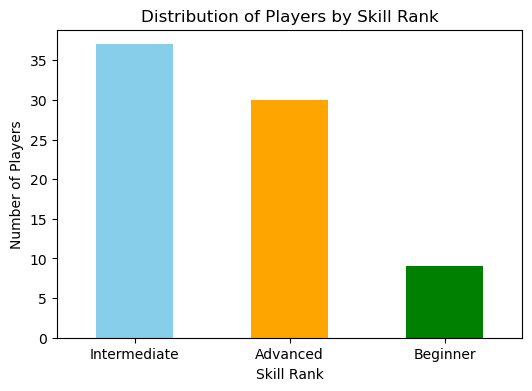

In [18]:
# Ranking visualisation
# Count the number of players in each rank
rank_counts = df_final['Skill_Rank'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
rank_counts.plot(kind='bar', color=['skyblue','orange','green'])
plt.title("Distribution of Players by Skill Rank")
plt.xlabel("Skill Rank")
plt.ylabel("Number of Players")
plt.xticks(rotation=0)
plt.show()

In [19]:
# Define and calculate the 4 main skill components
df_final['Cue_Ball_Control'] = (df_final['BU Drill 8 (max 20)'] / 20)
df_final['Ball_Pocketing'] = (df_final['BU Drill 6 (max 10)'] / 10)
df_final['Pattern_Play'] = df_final['Win % tournaments']
df_final['Stroke_Quality'] = round(((df_final['BU Drill 7 (max 20)'] + df_final['BU Drill 2 (max 10)']) / 30), 2)

# Display the relevant columns
display(df_final[['Name', 'Cue_Ball_Control', 'Ball_Pocketing', 'Pattern_Play', 'Stroke_Quality']])

,Name,Cue_Ball_Control,Ball_Pocketing,Pattern_Play,Stroke_Quality
0,Dimitar Vladislavov,0.20,0.2,0.00,0.13
1,Kalin Varbanov,0.70,0.8,0.64,0.70
2,Alexander Georgiev,0.75,0.8,0.69,0.70
3,Milan Tomanov,0.45,0.4,0.07,0.23
4,Alex Kirilov,0.25,0.5,0.25,0.47
...,...,...,...,...,...
71,Daniel Christensen,0.25,0.4,0.19,0.27
72,Nick Medveditskov,0.35,0.7,0.00,0.33
73,Dave Anderson,0.35,0.4,0.39,0.30
74,Nancy Kennedy,0.25,0.5,0.46,0.43


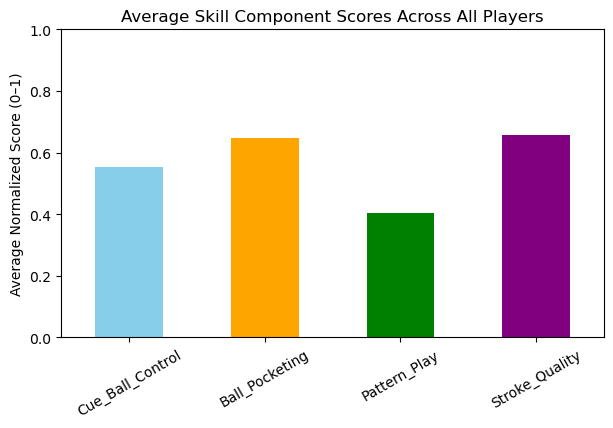

In [20]:
# Calculate average values across all players
avg_components = df_final[['Cue_Ball_Control','Ball_Pocketing','Pattern_Play','Stroke_Quality']].mean()

# Plot bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
avg_components.plot(kind='bar', color=['skyblue','orange','green','purple'])
plt.title("Average Skill Component Scores Across All Players")
plt.ylabel("Average Normalized Score (0–1)")
plt.ylim(0,1)
plt.xticks(rotation=30)
plt.show()


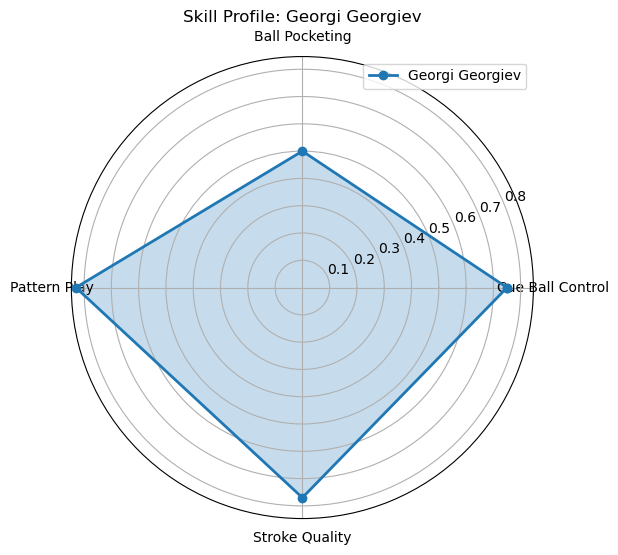

In [21]:
# Radar Chart for a player

player = "Georgi Georgiev"  # pick a player
skills = df_final[df_final['Name'] == player][['Cue_Ball_Control','Ball_Pocketing','Pattern_Play','Stroke_Quality']].values.flatten()

labels = ['Cue Ball Control','Ball Pocketing','Pattern Play','Stroke Quality']
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
skills = np.concatenate((skills,[skills[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, skills, 'o-', linewidth=2, label=player)
ax.fill(angles, skills, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title(f"Skill Profile: {player}")
ax.legend(loc='upper right')
plt.show()

In [22]:
# Define skill component columns
skill_component_cols = ['Cue_Ball_Control', 'Ball_Pocketing', 'Pattern_Play', 'Stroke_Quality']

# Calculate the "lacking" amount for each skill component ( max proficiency is 1.00)
for col in skill_component_cols:
    df_final[f'{col}_Lacking'] = 1.00 - df_final[col]

# Calculate the total "lacking" amount for normalization
df_final['Total_Lacking'] = df_final[[f'{col}_Lacking' for col in skill_component_cols]].sum(axis=1)

# Calculate the raw allocated time for each skill component based on strenghts and weaknesses
for col in skill_component_cols:
    df_final[f'{col}_Allocated_Hours_Raw'] = (df_final[f'{col}_Lacking'] / df_final['Total_Lacking']) * df_final['Practice_time_with_coach_weekly']

# Adjust allocated time to meet the minimum time slot of 0.5 hours
min_time_slot = 0.5

for col in skill_component_cols:
    raw_col = f'{col}_Allocated_Hours_Raw'
    allocated_col = f'{col}_Allocated_Hours'

    # Identify rows where the raw allocated time is less than the minimum time slot
    mask_less_than_min = df_final[raw_col] < min_time_slot

    # For rows less than the minimum, set the allocated time to the minimum
    df_final.loc[mask_less_than_min, allocated_col] = min_time_slot

    # For rows greater than or equal to the minimum, keep the raw allocated time
    mask_greater_than_min = df_final[raw_col] >= min_time_slot
    df_final.loc[mask_greater_than_min, allocated_col] = df_final.loc[mask_greater_than_min, raw_col]


# Re-normalize the allocated hours for rows where adjustments were made

# Calculate the sum of allocated hours after the minimum adjustment
df_final['Total_Allocated_Hours'] = df_final[[f'{col}_Allocated_Hours' for col in skill_component_cols]].sum(axis=1)

# Identify rows where the total allocated hours exceed the original practice hours
mask_exceeds_total = df_final['Total_Allocated_Hours'] > df_final['Practice_time_with_coach_weekly']

# For rows where the total allocated hours exceed the original, re-normalize
for col in skill_component_cols:
    allocated_col = f'{col}_Allocated_Hours'
    df_final.loc[mask_exceeds_total, allocated_col] = (
        df_final.loc[mask_exceeds_total, allocated_col] /
        df_final.loc[mask_exceeds_total, 'Total_Allocated_Hours'] *
        df_final.loc[mask_exceeds_total, 'Practice_time_with_coach_weekly']
    )


# Round the final allocated hours to the nearest 0.5 hours
for col in skill_component_cols:
    allocated_col = f'{col}_Allocated_Hours'
    df_final[allocated_col] = (df_final[allocated_col] * 2).round() / 2

# Adjust one column to ensure the sum is exactly equal to Practice_time_with_coach_weekly
df_final['Rounded_Sum_Allocated_Hours'] = df_final[[f'{col}_Allocated_Hours' for col in skill_component_cols]].sum(axis=1)
df_final['Rounding_Difference'] = df_final['Practice_time_with_coach_weekly'] - df_final['Rounded_Sum_Allocated_Hours']

for index, row in df_final.iterrows():
    difference = row['Rounding_Difference']
    if abs(difference) > 0.01: # Check if there is a meaningful difference
        # Find the column with the largest allocated hours to adjust
        largest_col = None
        largest_value = -1
        for col in skill_component_cols:
            allocated_col = f'{col}_Allocated_Hours'
            if row[allocated_col] > largest_value:
                largest_value = row[allocated_col]
                largest_col = allocated_col

        if largest_col:
            # Adjust the largest allocated hour to absorb the difference
            df_final.loc[index, largest_col] += difference
            # Ensure the adjusted value is still at least the minimum time slot
            if df_final.loc[index, largest_col] < min_time_slot:
                 # If adjusting makes it less than min, set to min and distribute the rest
                 adjustment_needed = min_time_slot - df_final.loc[index, largest_col]
                 df_final.loc[index, largest_col] = min_time_slot
                 # Distribute the remaining adjustment among other columns (optional, can be complex)
                 # For simplicity here, we assume the largest adjustment is sufficient or handle edge cases manually if needed.
                 # A more robust solution for edge cases might involve a more complex distribution.
                 pass # Keeping it simple for this adjustment

# Display the relevant columns and re-check the sum
display(df_final[['Name', 'Practice_time_with_coach_weekly','Skill_Rank'] + [f'{col}_Allocated_Hours' for col in skill_component_cols]])

# Re-check the sum of allocated hours after adjustment
df_final['Final_Sum_Check'] = df_final[[f'{col}_Allocated_Hours' for col in skill_component_cols]].sum(axis=1)
discrepancies_after_adjustment = df_final[abs(df_final['Final_Sum_Check'] - df_final['Practice_time_with_coach_weekly']) > 0.01]

if discrepancies_after_adjustment.empty:
    print("Final check successful: The sum of allocated hours for each player is exactly equal to their practice hours per week.")
else:
    print("Final check failed: Discrepancies still found after adjustment.")
    display(discrepancies_after_adjustment[['Name', 'Practice_time_with_coach_weekly', 'Final_Sum_Check', 'Final_Sum_Check']])


# Drop temporary columns
df_final = df_final.drop(columns=['Cue_Ball_Control_Lacking', 'Ball_Pocketing_Lacking', 'Pattern_Play_Lacking', 'Stroke_Quality_Lacking',
                                  'Total_Lacking', 'Cue_Ball_Control_Allocated_Hours_Raw', 'Ball_Pocketing_Allocated_Hours_Raw',
                                  'Pattern_Play_Allocated_Hours_Raw', 'Stroke_Quality_Allocated_Hours_Raw', 'Total_Allocated_Hours',
                                  'Rounded_Sum_Allocated_Hours', 'Rounding_Difference', 'Final_Sum_Check'], errors='ignore')

,Name,Practice_time_with_coach_weekly,Skill_Rank,Cue_Ball_Control_Allocated_Hours,Ball_Pocketing_Allocated_Hours,Pattern_Play_Allocated_Hours,Stroke_Quality_Allocated_Hours
0,Dimitar Vladislavov,9,Beginner,2.0,2.0,2.5,2.5
1,Kalin Varbanov,6,Advanced,1.5,1.0,2.0,1.5
2,Alexander Georgiev,15,Advanced,3.5,3.0,4.5,4.0
3,Milan Tomanov,13,Beginner,2.5,2.5,4.5,3.5
4,Alex Kirilov,10,Intermediate,3.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...
71,Daniel Christensen,3,Beginner,0.5,0.5,1.0,1.0
72,Nick Medveditskov,6,Beginner,1.5,0.5,2.5,1.5
73,Dave Anderson,4,Intermediate,1.0,1.0,1.0,1.0
74,Nancy Kennedy,10,Intermediate,3.0,2.0,2.5,2.5


Final check successful: The sum of allocated hours for each player is exactly equal to their practice hours per week.


In [23]:
df_final

,Name,Years of experience playing,Years of tournament experience,Win % tournaments,BU Drill 1 (max 10),BU Drill 2 (max 10),BU Drill 3 (max 10),BU Drill 4 (max 10),BU Drill 5 (max 10),BU Drill 6 (max 10),...,Rounded_Predicted_Skill_Level_After_1Y,Skill_Rank,Cue_Ball_Control,Ball_Pocketing,Pattern_Play,Stroke_Quality,Cue_Ball_Control_Allocated_Hours,Ball_Pocketing_Allocated_Hours,Pattern_Play_Allocated_Hours,Stroke_Quality_Allocated_Hours
0,Dimitar Vladislavov,0.3,0.0,0.00,2,2,1,1,1,2,...,4,Beginner,0.20,0.2,0.00,0.13,2.0,2.0,2.5,2.5
1,Kalin Varbanov,23.0,22.0,0.64,9,10,8,7,5,8,...,9,Advanced,0.70,0.8,0.64,0.70,1.5,1.0,2.0,1.5
2,Alexander Georgiev,11.0,9.0,0.69,6,6,10,8,8,8,...,10,Advanced,0.75,0.8,0.69,0.70,3.5,3.0,4.5,4.0
3,Milan Tomanov,1.0,0.6,0.07,4,3,3,4,2,4,...,7,Beginner,0.45,0.4,0.07,0.23,2.5,2.5,4.5,3.5
4,Alex Kirilov,1.5,0.5,0.25,3,7,5,3,1,5,...,6,Intermediate,0.25,0.5,0.25,0.47,3.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Daniel Christensen,4.0,2.0,0.19,6,5,5,4,2,4,...,4,Beginner,0.25,0.4,0.19,0.27,0.5,0.5,1.0,1.0
72,Nick Medveditskov,4.0,0.0,0.00,4,4,3,4,3,7,...,5,Beginner,0.35,0.7,0.00,0.33,1.5,0.5,2.5,1.5
73,Dave Anderson,9.0,7.0,0.39,5,5,4,2,3,4,...,5,Intermediate,0.35,0.4,0.39,0.30,1.0,1.0,1.0,1.0
74,Nancy Kennedy,3.0,2.0,0.46,5,5,4,2,3,5,...,6,Intermediate,0.25,0.5,0.46,0.43,3.0,2.0,2.5,2.5


In [24]:
# Remove display limits
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)    # Prevent line wrapping
pd.set_option('display.max_colwidth', None) # Show full cell content

# Display the whole DataFrame
display(df_final)

,Name,Years of experience playing,Years of tournament experience,Win % tournaments,BU Drill 1 (max 10),BU Drill 2 (max 10),BU Drill 3 (max 10),BU Drill 4 (max 10),BU Drill 5 (max 10),BU Drill 6 (max 10),BU Drill 7 (max 20),BU Drill 8 (max 20),BU Total (max 100),Table Difficulty: Mouth Size,Table Difficulty: Throat Size,Table Difficulty: Shelf Depth,Table Difficulty: Total (calculated with tool),FargoRate,Mental Drills (0/1),Average weekly practice time,Rounded_Calculated_Skill_Level,Practice_time_with_coach_weekly,Skill_Level_Rounded,Rounded_Predicted_Skill_Level_After_1Y,Skill_Rank,Cue_Ball_Control,Ball_Pocketing,Pattern_Play,Stroke_Quality,Cue_Ball_Control_Allocated_Hours,Ball_Pocketing_Allocated_Hours,Pattern_Play_Allocated_Hours,Stroke_Quality_Allocated_Hours
0,Dimitar Vladislavov,0.3,0.0,0.00,2,2,1,1,1,2,2,4,15,4.300,3.800,1.80,1.06,173,0,0.0,1.0,9,1,4,Beginner,0.20,0.2,0.00,0.13,2.0,2.0,2.5,2.5
1,Kalin Varbanov,23.0,22.0,0.64,9,10,8,7,5,8,11,14,72,4.150,3.700,1.70,1.09,693,0,5.0,8.0,6,8,9,Advanced,0.70,0.8,0.64,0.70,1.5,1.0,2.0,1.5
2,Alexander Georgiev,11.0,9.0,0.69,6,6,10,8,8,8,15,15,76,4.300,3.800,1.80,1.06,696,0,10.0,8.0,15,8,10,Advanced,0.75,0.8,0.69,0.70,3.5,3.0,4.5,4.0
3,Milan Tomanov,1.0,0.6,0.07,4,3,3,4,2,4,4,9,33,4.300,3.800,1.80,1.06,272,1,11.0,3.0,13,3,7,Beginner,0.45,0.4,0.07,0.23,2.5,2.5,4.5,3.5
4,Alex Kirilov,1.5,0.5,0.25,3,7,5,3,1,5,7,5,36,4.300,3.800,1.80,1.06,363,1,7.0,4.0,10,4,6,Intermediate,0.25,0.5,0.25,0.47,3.0,2.0,3.0,2.0
5,Stanislav Boyanov,3.5,0.5,0.57,8,5,6,6,5,7,7,11,55,4.300,3.800,1.80,1.06,542,1,8.0,6.0,15,6,9,Intermediate,0.55,0.7,0.57,0.40,4.0,2.5,3.5,5.0
6,Georgi Terziyski,3.5,3.0,0.61,10,8,8,7,6,5,16,17,77,4.000,3.800,1.90,1.20,609,1,20.0,7.0,7,7,8,Advanced,0.85,0.5,0.61,0.80,1.0,3.0,2.0,1.0
7,Antonio Nikolov,7.0,4.5,0.46,10,8,8,1,8,6,13,8,62,4.000,3.600,2.00,1.22,537,0,4.0,6.0,9,6,8,Intermediate,0.40,0.6,0.46,0.70,3.0,2.0,2.5,1.5
8,Emil Michev,9.0,5.0,0.66,7,6,7,10,10,5,13,11,69,4.350,4.000,1.80,1.05,626,1,12.0,7.0,12,7,8,Advanced,0.55,0.5,0.66,0.63,3.5,3.5,2.5,2.5
9,Georgi Georgiev,18.0,16.0,0.83,10,10,10,10,10,5,13,15,83,4.300,3.800,1.80,1.06,784,1,30.0,10.0,5,10,10,Advanced,0.75,0.5,0.83,0.77,1.0,2.5,0.5,1.0


In [52]:
df_final.columns

Index(['Name', 'Years of experience playing', 'Years of tournament experience',
       'Win % tournaments', 'BU Drill 1 (max 10)', 'BU Drill 2 (max 10)',
       'BU Drill 3 (max 10)', 'BU Drill 4 (max 10)', 'BU Drill 5 (max 10)',
       'BU Drill 6 (max 10)', 'BU Drill 7 (max 20)', 'BU Drill 8 (max 20)',
       'BU Total (max 100)', 'Table Difficulty: Mouth Size',
       'Table Difficulty: Throat Size', 'Table Difficulty: Shelf Depth',
       'Table Difficulty: Total (calculated with tool)', 'FargoRate',
       'Mental Drills (0/1)', 'Average weekly practice time',
       'Rounded_Calculated_Skill_Level', 'Practice_time_with_coach_weekly',
       'Skill_Level_Rounded', 'Rounded_Predicted_Skill_Level_After_1Y',
       'Skill_Rank', 'Cue_Ball_Control', 'Ball_Pocketing', 'Pattern_Play',
       'Stroke_Quality', 'Cue_Ball_Control_Allocated_Hours',
       'Ball_Pocketing_Allocated_Hours', 'Pattern_Play_Allocated_Hours',
       'Stroke_Quality_Allocated_Hours'],
      dtype='object')